In [5]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
lr = LinearRegression()
rfr = RandomForestRegressor()

In [6]:
path = "https://raw.githubusercontent.com/ovibaridar/Data_sets/main/concrete.csv"

In [8]:
data = pd.read_csv(path)

In [9]:
data.head(3)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [10]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'strength'],
      dtype='object')

In [13]:
#rename columns name 
for col in data.columns:
    columns_name = ''
    for letter in col:
        if letter =='(':
            break 
        columns_name = columns_name + letter
    data.rename(columns={col: columns_name}, inplace=True)

In [14]:
data.head(3)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [15]:
data.isnull().sum()

Cement                 0
Blast Furnace Slag     0
Fly Ash                0
Water                  0
Superplasticizer       0
Coarse Aggregate       0
Fine Aggregate         0
Age                    0
strength               0
dtype: int64

In [16]:
data.duplicated().sum()

25

In [17]:
data = data.drop_duplicates()

In [18]:
data.duplicated().sum()

0

Text(0, 0.5, 'strength')

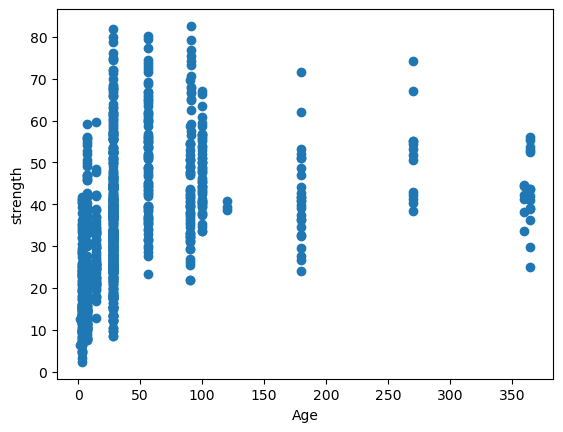

In [26]:
plt.scatter(x = data["Age "] , y = data["strength"])
plt.xlabel("Age")
plt.ylabel("strength")

In [28]:
x = data.drop("strength" , axis=1)
y = data["strength"]

In [29]:
print(x.shape)
print(y.shape)

(1005, 8)
(1005,)


In [30]:
xtrain , xtest , ytrain , ytest  = train_test_split(x , y , random_state=41 , test_size=.30) #split 

In [32]:
print(xtrain.shape)
print(xtest.shape)

(703, 8)
(302, 8)


In [33]:
lr.fit(xtrain , ytrain)

LinearRegression()

In [34]:
rfr.fit(xtrain , ytrain)

RandomForestRegressor()

In [35]:
print("LinearRegression train score = " , lr.score(xtrain , ytrain))
print("RandomForestRegressor train score = " , rfr.score(xtrain , ytrain))

LinearRegression train score =  0.6182820522999009
RandomForestRegressor train score =  0.9835274833510995


In [36]:
print("LinearRegression test score = " , lr.score(xtest , ytest))
print("RandomForestRegressor test score = " , rfr.score(xtest , ytest))

LinearRegression test score =  0.5633190246815577
RandomForestRegressor test score =  0.8867570803943491


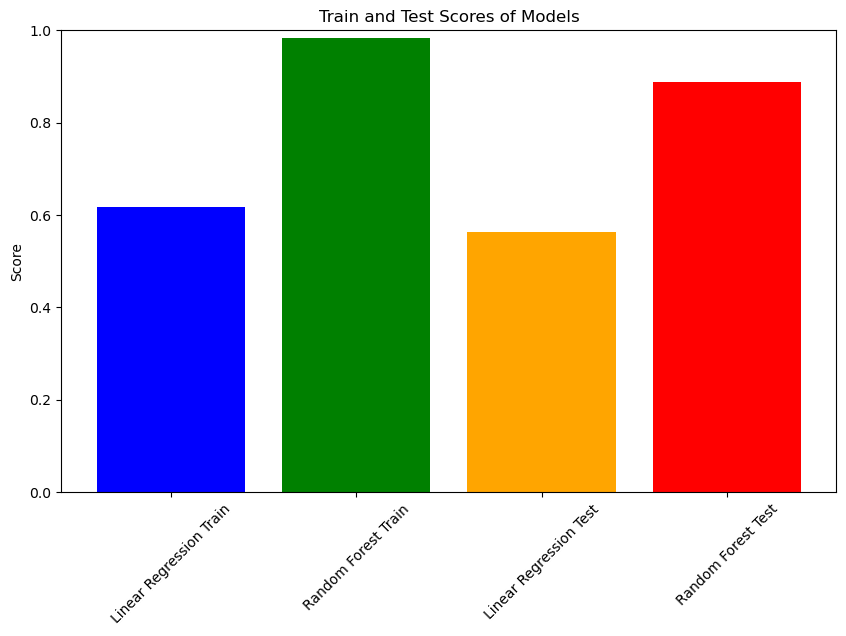

In [38]:
lr_train_score = lr.score(xtrain, ytrain)
rfr_train_score = rfr.score(xtrain, ytrain)
lr_test_score = lr.score(xtest, ytest)
rfr_test_score = rfr.score(xtest, ytest)

# Plotting
labels = ['Linear Regression Train', 'Random Forest Train', 'Linear Regression Test', 'Random Forest Test']
scores = [lr_train_score, rfr_train_score, lr_test_score, rfr_test_score]

plt.figure(figsize=(10, 6))
plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Train and Test Scores of Models')
plt.ylabel('Score')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

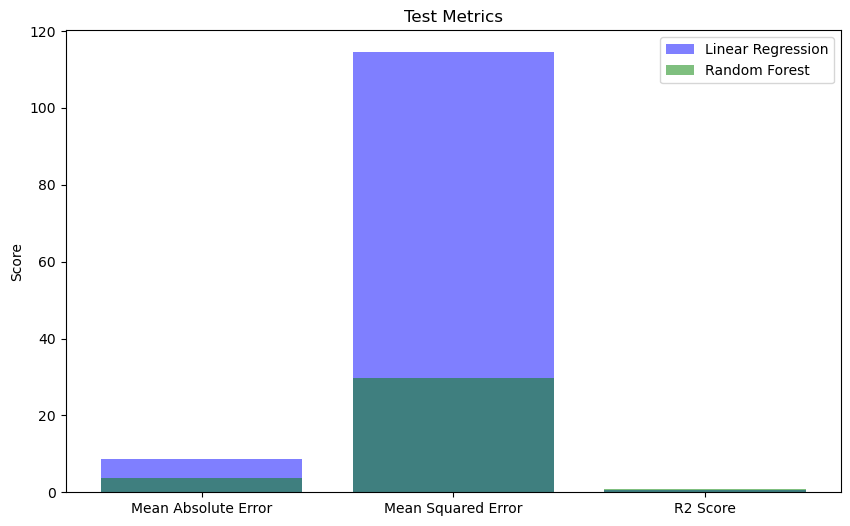

In [39]:
lr_test_mae = mean_absolute_error(ytest, lr.predict(xtest))
lr_test_mse = mean_squared_error(ytest, lr.predict(xtest))
lr_test_r2 = r2_score(ytest, lr.predict(xtest))

rfr_test_mae = mean_absolute_error(ytest, rfr.predict(xtest))
rfr_test_mse = mean_squared_error(ytest, rfr.predict(xtest))
rfr_test_r2 = r2_score(ytest, rfr.predict(xtest))

# Plotting test metrics
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'R2 Score']
lr_test_metrics = [lr_test_mae, lr_test_mse, lr_test_r2]
rfr_test_metrics = [rfr_test_mae, rfr_test_mse, rfr_test_r2]

plt.figure(figsize=(10, 6))

# Plotting for Linear Regression
plt.bar(metrics, lr_test_metrics, color='blue', alpha=0.5, label='Linear Regression')
# Plotting for Random Forest
plt.bar(metrics, rfr_test_metrics, color='green', alpha=0.5, label='Random Forest')

plt.title('Test Metrics')
plt.ylabel('Score')
plt.legend()
plt.show()